In [ ]:
import pandas as pd
import numpy as np
import yfinance as yf
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch
from scipy.cluster.hierarchy import linkage, leaves_list
from numpy.random import rand, seed

#Step 3

In [ ]:
# List of stock tickers for financial and non-financial institutions
financial_stocks = ['JPM', 'BAC', 'C', 'GS', 'MS', 'WFC', 'USB', 'AXP', 'PNC', 'BK', 'STT', 'TROW', 'BLK', 'COF', 'SCHW']
non_financial_stocks = ['AAPL', 'MSFT', 'GOOGL', 'AMZN', 'GE', 'PG', 'KO', 'PEP', 'JNJ', 'VZ', 'T', 'INTC', 'IBM']

# Define the period for data collection
start_date = '2008-09-01'
end_date = '2008-10-31'

# Function to get data and calculate returns
def get_stock_returns(tickers, start, end):
    data = yf.download(tickers, start=start, end=end)['Adj Close']
    returns = data.pct_change().dropna()  # Calculate daily returns
    return returns

# Collecting data for both groups
financial_returns = get_stock_returns(financial_stocks, start_date, end_date)
non_financial_returns = get_stock_returns(non_financial_stocks, start_date, end_date)

# Combine and save to a CSV file for further use
all_returns = pd.concat([financial_returns, non_financial_returns], axis=1)
all_returns = all_returns[(all_returns != 0).all(axis=1)]
all_returns.to_csv('daily_returns_2008.csv')


[*********************100%***********************]  15 of 15 completed
[*********************100%***********************]  13 of 13 completed


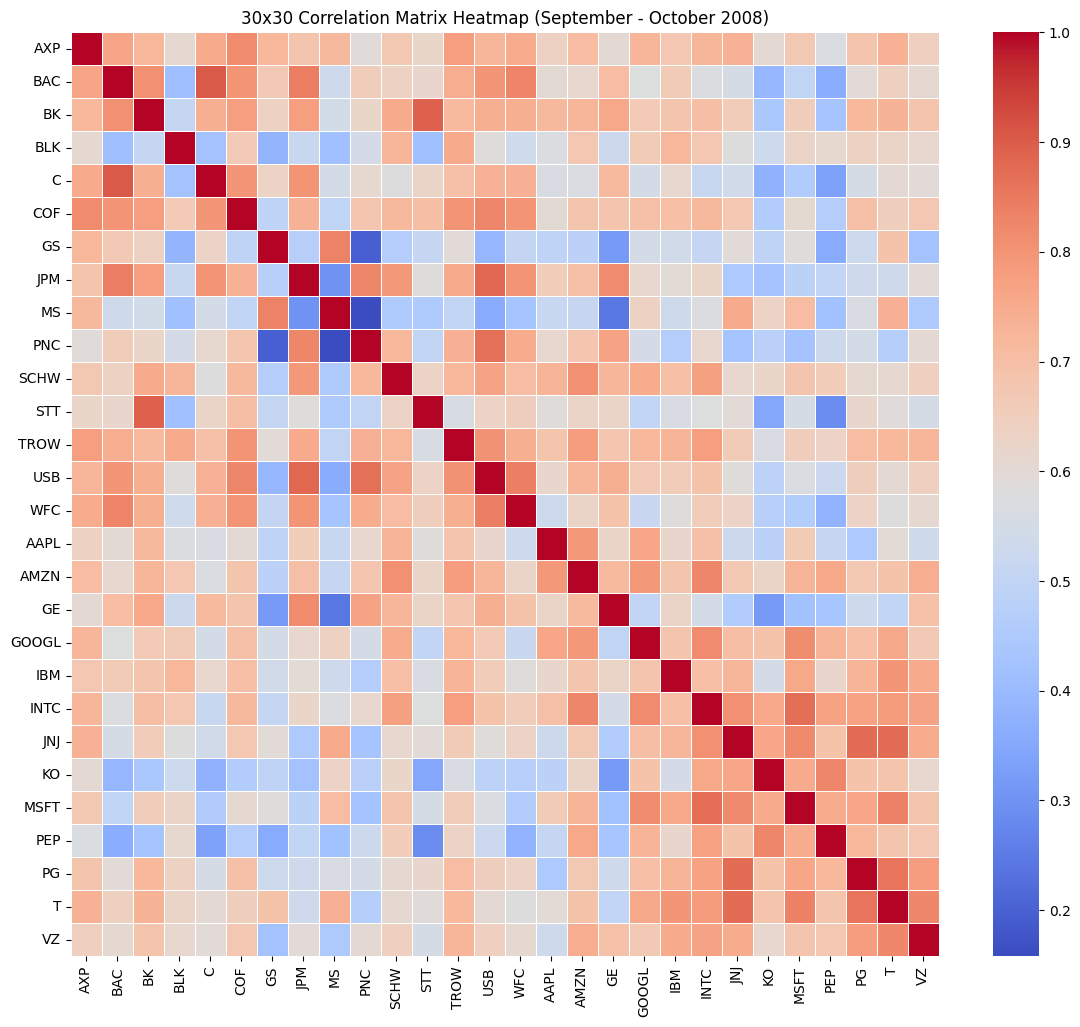

In [ ]:
# Load the daily returns data collected in Step 3
daily_returns = pd.read_csv('daily_returns_2008.csv', index_col=0, parse_dates=True)

# Calculate the correlation matrix
correlation_matrix = daily_returns.corr()

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', linewidths=0.5)
plt.title('30x30 Correlation Matrix Heatmap (September - October 2008)')
plt.show()



In [ ]:
# Check for NaN or infinite values
if correlation_matrix.isnull().values.any() or np.isinf(correlation_matrix.values).any():
    print("The correlation matrix contains NaN or infinite values.")

# Replace NaN or infinite values with 0 (or any other appropriate value)
correlation_matrix = correlation_matrix.replace([np.inf, -np.inf], np.nan).fillna(0)


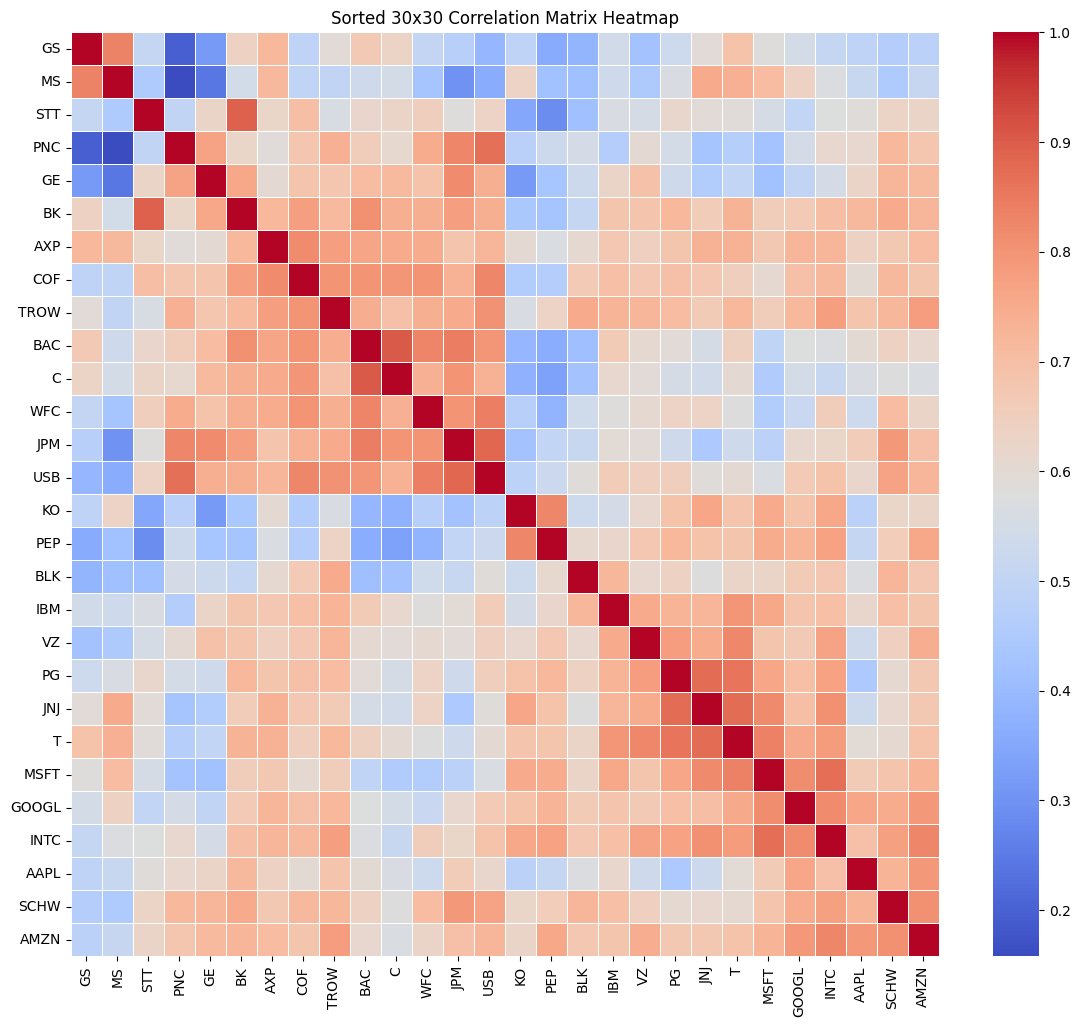

In [ ]:
# Perform hierarchical clustering on the cleaned correlation matrix
linkage_matrix = linkage(correlation_matrix, method='average')
sorted_indices = leaves_list(linkage_matrix)

# Reorder the correlation matrix and heatmap based on clustering
sorted_correlation_matrix = correlation_matrix.iloc[sorted_indices, sorted_indices]

# Plot the reordered heatmap
plt.figure(figsize=(14, 12))
sns.heatmap(sorted_correlation_matrix, annot=False, cmap='coolwarm', linewidths=0.5)
plt.title('Sorted 30x30 Correlation Matrix Heatmap')
plt.show()


##Step 6(b): Member B – Python Implementation of the UCB Algorithm
Implementation of the UCB Algorithm in Python: Below is the Python code that follows the pseudocode created by Member A. This implementation will use relevant Python packages to ensure an efficient and functional execution of the UCB algorithm.

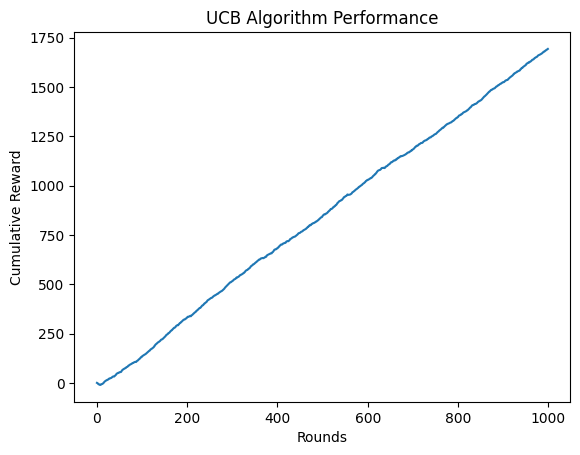

In [ ]:
# Parameters
num_rounds = 1000  # Total number of rounds
num_arms = 10  # Number of arms (choices)
true_means = np.random.normal(0, 1, num_arms)  # True mean rewards for each arm
counts = np.zeros(num_arms)  # Number of times each arm has been selected
estimated_means = np.zeros(num_arms)  # Estimated mean reward for each arm
total_reward = 0  # Total accumulated reward
rewards = []  # List to store total rewards at each step

# UCB Algorithm Implementation
for t in range(1, num_rounds + 1):
    # Select arm based on UCB
    if t <= num_arms:
        arm = t - 1  # Initially, select each arm once
    else:
        upper_confidence_bounds = estimated_means + np.sqrt(2 * np.log(t) / counts)
        arm = np.argmax(upper_confidence_bounds)  # Choose the arm with the highest UCB

    # Simulate the reward from the chosen arm
    reward = np.random.normal(true_means[arm], 1)
    total_reward += reward
    rewards.append(total_reward)

    # Update counts and estimated means
    counts[arm] += 1
    estimated_means[arm] += (reward - estimated_means[arm]) / counts[arm]

# Plot the cumulative rewards over time
plt.plot(rewards)
plt.xlabel('Rounds')
plt.ylabel('Cumulative Reward')
plt.title('UCB Algorithm Performance')
plt.show()


##Step 6(c): Member C – Code Commentary and Application
Detailed Comments of B’s Code: Member C has added comments throughout Member B’s implementation, ensuring clarity in understanding each section of the code. Below is the annotated code with explanations:

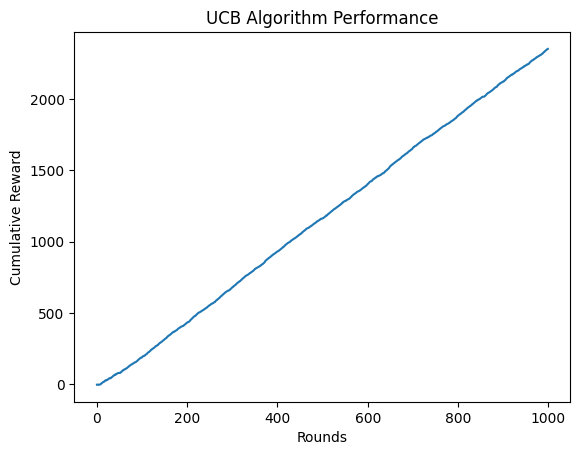

In [ ]:
# Initialize parameters for the UCB algorithm
num_rounds = 1000  # Total number of rounds for the simulation
num_arms = 10  # Number of different choices (arms)
true_means = np.random.normal(0, 1, num_arms)  # True mean reward for each arm, simulated
counts = np.zeros(num_arms)  # Tracks the number of times each arm is selected
estimated_means = np.zeros(num_arms)  # Stores the estimated mean rewards for each arm
total_reward = 0  # Total cumulative reward accumulated over time
rewards = []  # List to store cumulative rewards at each time step

# Loop through each round to select arms and update values
for t in range(1, num_rounds + 1):
    if t <= num_arms:
        arm = t - 1  # During the initial phase, each arm is selected once
    else:
        # Calculate UCB for each arm
        upper_confidence_bounds = estimated_means + np.sqrt(2 * np.log(t) / counts)
        arm = np.argmax(upper_confidence_bounds)  # Choose the arm with the highest UCB

    # Simulate the reward received from selecting the chosen arm
    reward = np.random.normal(true_means[arm], 1)
    total_reward += reward  # Update the total reward
    rewards.append(total_reward)  # Track the cumulative reward at this round

    # Update the counts and estimated mean reward for the chosen arm
    counts[arm] += 1
    estimated_means[arm] += (reward - estimated_means[arm]) / counts[arm]  # Incremental update

# Plot the cumulative rewards over time
plt.plot(rewards)
plt.xlabel('Rounds')  # Label for the x-axis
plt.ylabel('Cumulative Reward')  # Label for the y-axis
plt.title('UCB Algorithm Performance')  # Plot title
plt.show()  # Display the plot


In [ ]:
def optimal_action(qvalue, eps):  # noQA E203
    """
    Determines what is the action to take given a measure of past
    expected rewards across actions. With probability eps the action
    is not the greedy one
    """
    nactions = qvalue.shape[0]
    action_hat = np.where(qvalue == np.max(qvalue))

    if rand() <= eps:
        randnum = rand()
        for aa in range(nactions):
            if randnum < (aa + 1) / nactions:  # noQA E203
                break
    elif action_hat[0].shape[0] > 1:  # noQA E203
        # Randomize action when ties
        randnum = rand()
        for aa in range(action_hat[0].shape[0]):  # noQA E203
            if randnum < (aa + 1) / action_hat[0].shape[0]:  # noQA E203
                break
        aa = action_hat[0][aa]
    else:
        aa = np.argmax(qvalue)

    return aa

In [ ]:
def reward_update(action, reward, qvalue_old, alpha):  # noQA E203
    qvalue_new = qvalue_old.copy()

    qvalue_new[action] = qvalue_old[action] + alpha * (reward - qvalue_old[action])

    return qvalue_new

In [ ]:
# Bandit problem for stock selection

YData = all_returns.to_numpy()
YData_dates = pd.to_datetime(all_returns.index, format="%Y-%m-%d")
tickers = all_returns.columns

NK = 5
EPSILON = 0.1
ALPHA = 0.975
NEPISODES = 1000
HOLD = 1
TMAX = YData.shape[0] - HOLD  # Adjusted TMAX to avoid out-of-bounds errors

seed(1234)

reward_avg = np.zeros((TMAX))
optimal_avg = np.zeros((TMAX))
reward_queue = np.zeros((HOLD, 2))

for run in range(NEPISODES):  # noQA E203
    # Initialize q function and actions record
    qvalue = np.zeros((NK))
    qvalue_up = np.zeros((NK))
    nactions = np.zeros((NK))
    for tt in range(TMAX):  # noQA E203
        aa_opt = optimal_action(qvalue_up, EPSILON)
        nactions[aa_opt] += 1
        # Compute reward as return over holding period
        reward_queue[HOLD - 1, 0] = (
            YData[tt + HOLD, aa_opt] - YData[tt, aa_opt]
        ) / YData[tt, aa_opt]
        reward_queue[HOLD - 1, 1] = aa_opt
        # Update Q function using action chosen HOLD days before
        qvalue = reward_update(
            int(reward_queue[0, 1]), reward_queue[0, 0], qvalue, ALPHA
        )
        # Upper-confidence adjustment
        qvalue_up = np.zeros((NK))
        for aa in range(NK):
            if nactions[aa] == 0:  # noQA E203
                qvalue_up[aa] = np.max(qvalue) + 1.0
            else:
                qvalue_up[aa] = qvalue[aa] + np.sqrt(np.log(tt + 1) / nactions[aa])
        reward_queue[0 : HOLD - 1, :] = reward_queue[1:HOLD, :]  # noQA E203
        reward_avg[tt] += reward_queue[HOLD - 1, 0] / NEPISODES
        optimal_avg[tt] += (
            aa_opt == np.argmax((YData[tt + HOLD, :] - YData[tt, :]) / YData[tt, :])
        ) / NEPISODES  # noQA E203


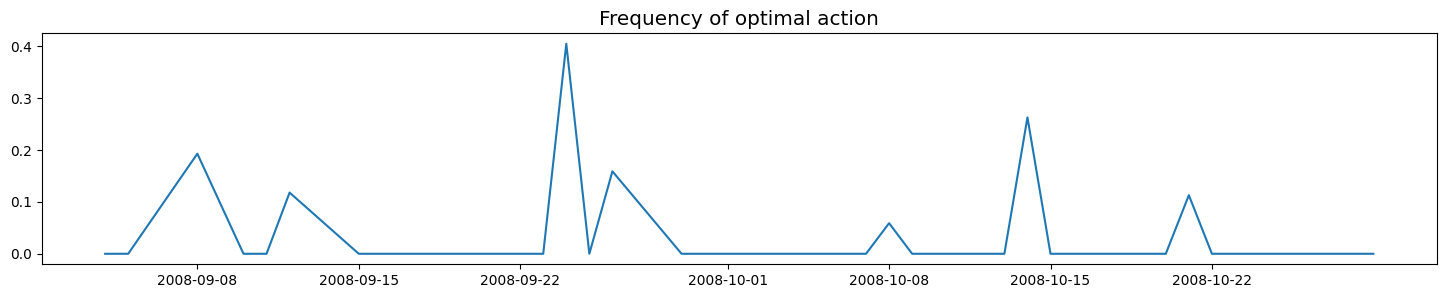

In [ ]:
plt.plot(YData_dates[HOLD : YData.shape[0]], optimal_avg)  # noQA E203
plt.title("Frequency of optimal action", fontsize="x-large")

fig = plt.gcf()
fig.set_size_inches(18, 3)
plt.show()

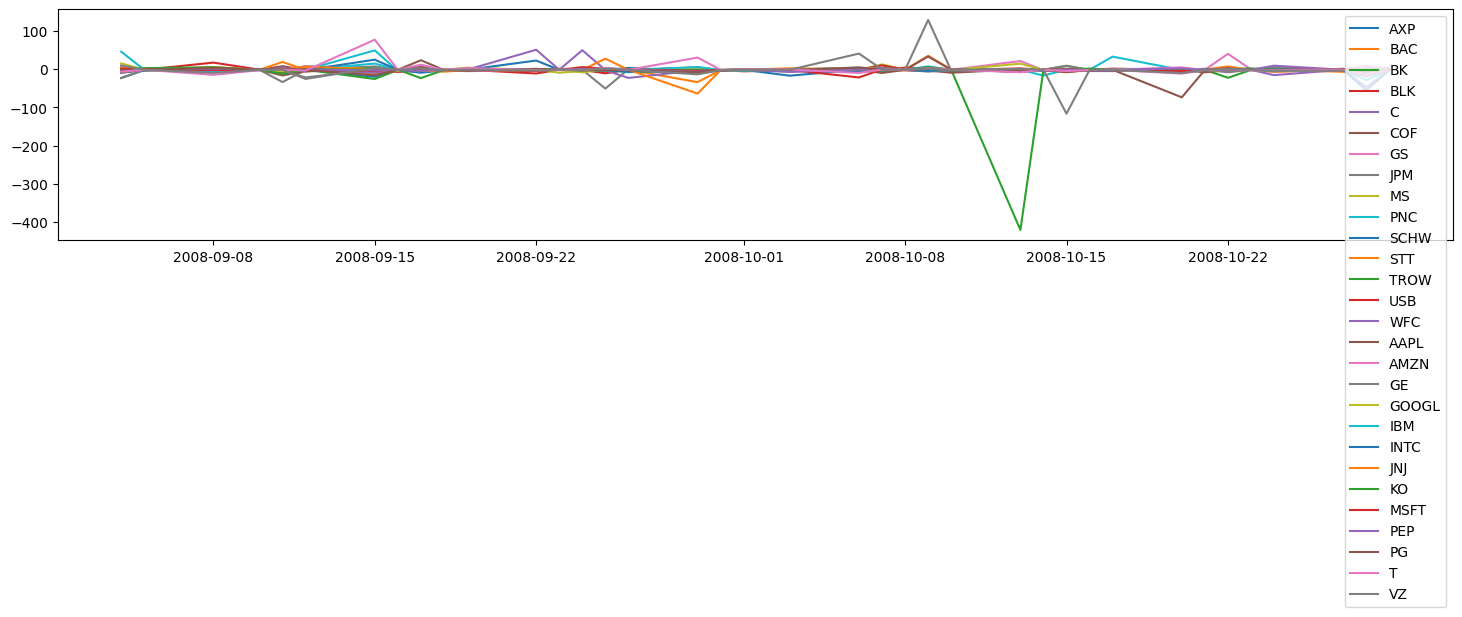

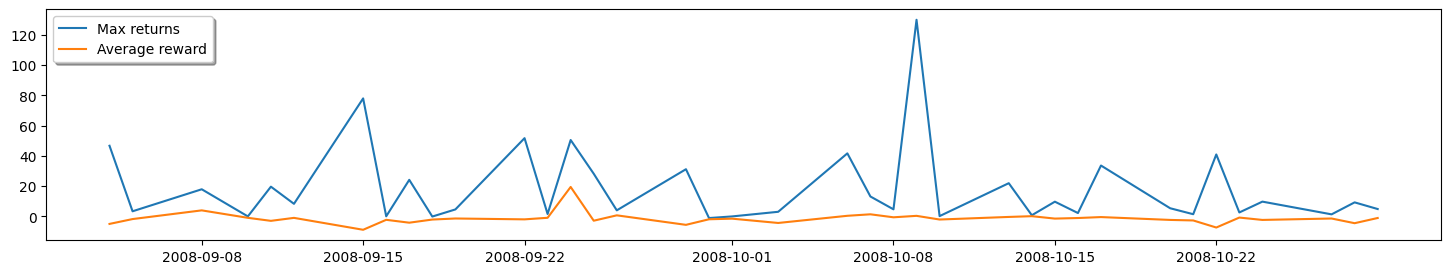

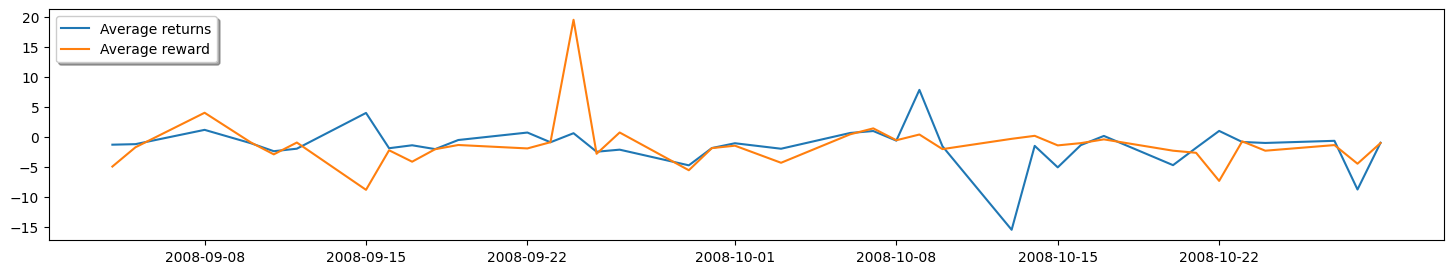

0.034473684210526344
-1.0 53.96168735055006
-1.0 65.24128661271288


In [ ]:
plt.plot(
    YData_dates[HOLD : YData.shape[0]],
    (YData[HOLD : YData.shape[0], :] - YData[0:TMAX, :]) / YData[0:TMAX, :],
)  # noQA E203
plt.legend(tickers)
fig = plt.gcf()
fig.set_size_inches(18, 3)
plt.show()

plt.plot(
    YData_dates[HOLD : YData.shape[0]],
    np.max(
        (YData[HOLD : YData.shape[0], :] - YData[0:TMAX, :]) / YData[0:TMAX, :], axis=1
    ),
    label="Max returns",
)  # noQA E203
plt.plot(
    YData_dates[HOLD : YData.shape[0]], reward_avg, label="Average reward"
)  # noQA E203
legend = plt.legend(loc="upper left", shadow=True)
fig = plt.gcf()
fig.set_size_inches(18, 3)
plt.show()

plt.plot(
    YData_dates[HOLD : YData.shape[0]],
    np.mean(
        (YData[HOLD : YData.shape[0], :] - YData[0:TMAX, :]) / YData[0:TMAX, :], axis=1
    ),
    label="Average returns",
)  # noQA E203
plt.plot(
    YData_dates[HOLD : YData.shape[0]], reward_avg, label="Average reward"
)  # noQA E203
legend = plt.legend(loc="upper left", shadow=True)
fig = plt.gcf()
fig.set_size_inches(18, 3)
plt.show()

# Average frequency of optimal action
print(np.mean(optimal_avg))
# Average annualized return from holding the equally-weighted portfolio
print(
    (
        1
        + np.mean(
            (YData[HOLD : YData.shape[0], :] - YData[0:TMAX, :]) / YData[0:TMAX, :]
        )
    )
    ** (250 / HOLD)
    - 1,
    np.sqrt(250 / HOLD)
    * np.std(
        np.mean(
            (YData[HOLD : YData.shape[0], :] - YData[0:TMAX, :]) / YData[0:TMAX, :],
            axis=1,
        )
    ),
)  # noQA E203
# Average annualized return from holding the Bandit portfolio
print(
    (1 + np.mean(reward_avg)) ** (250 / HOLD) - 1,
    np.sqrt(250 / HOLD) * np.std(reward_avg),
)

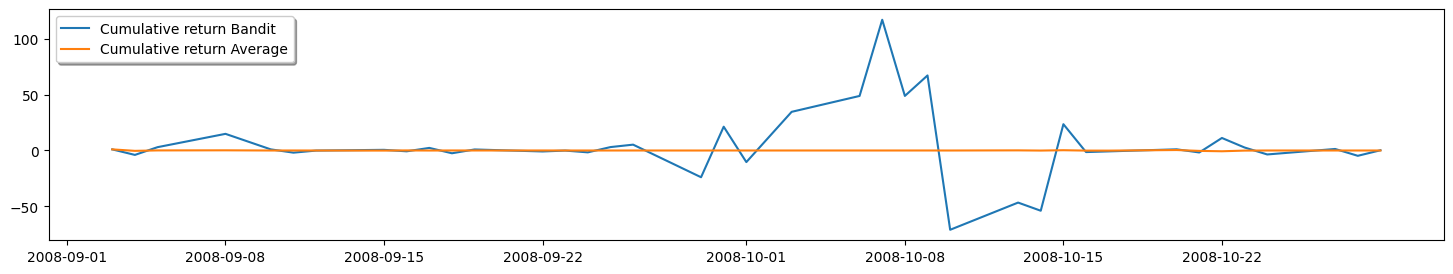

In [ ]:
return_cumulative = np.zeros((TMAX + 1, 2))
return_cumulative[0, 0] = 1
return_cumulative[0, 1] = 1
for tt in range(1, TMAX + 1):  # noQA E203
    return_cumulative[tt, 0] = return_cumulative[tt - 1, 0] * (1 + reward_avg[tt - 1])
    rmean = np.mean(
        (YData[tt + HOLD - 1, :] - YData[tt - 1, :]) / YData[tt - 1, :]
    )  # noQA E203
    return_cumulative[tt, 1] = return_cumulative[tt - 1, 1] * (1 + rmean)  # noQA E203

plt.plot(
    YData_dates[HOLD - 1 : YData.shape[0]],
    return_cumulative[:, 0],
    label="Cumulative return Bandit",
)  # noQA E203
plt.plot(
    YData_dates[HOLD - 1 : YData.shape[0]],
    return_cumulative[:, 1],
    label="Cumulative return Average",
)  # noQA E203
legend = plt.legend(loc="upper left", shadow=True)
fig = plt.gcf()
fig.set_size_inches(18, 3)
plt.show()

Step 8: Implementation of the Epsilon-Greedy Algorithm

8a. Pseudocode for the Epsilon-Greedy Algorithm

In [ ]:
import random

def initialize(n, k, epsilon):
    counts = [0] * k
    sums = [0] * k
    return n, k, epsilon, counts, sums

def get_reward(selected_arm): # Placeholder, replace with actual reward function
    # Simulate or retrieve reward from data
    return random.random()

def run_simulation(n, k, epsilon):
    n, k, epsilon, counts, sums = initialize(n,k,epsilon)
    for t in range(n):
        if random.random() < epsilon:
            selected_arm = random.randint(0, k - 1)  # Exploration
        else:
            if all(c == 0 for c in counts): # Handle initial case where all counts are zero to avoid division by zero.
                selected_arm = random.randint(0,k-1)
            else:
              average_rewards = [(sums[i] / counts[i]) if counts[i] > 0 else 0 for i in range(k)]
              selected_arm = average_rewards.index(max(average_rewards)) # Exploitation

        reward = get_reward(selected_arm)
        counts[selected_arm] += 1
        sums[selected_arm] += reward

import random

def initialize(n, k, epsilon):
    counts = [0] * k
    sums = [0] * k
    return n, k, epsilon, counts, sums

def get_reward(selected_arm): # Placeholder, replace with actual reward function
    # Simulate or retrieve reward from data
    return random.random()

def run_simulation(n, k, epsilon):
    n, k, epsilon, counts, sums = initialize(n,k,epsilon)
    for t in range(n):
        if random.random() < epsilon:
            selected_arm = random.randint(0, k - 1)  # Exploration
        else:
            if all(c == 0 for c in counts): # Handle initial case where all counts are zero to avoid division by zero.
                selected_arm = random.randint(0,k-1)
            else:
              average_rewards = [(sums[i] / counts[i]) if counts[i] > 0 else 0 for i in range(k)]
              selected_arm = average_rewards.index(max(average_rewards)) # Exploitation

        reward = get_reward(selected_arm)
        counts[selected_arm] += 1
        sums[selected_arm] += reward




def initialize(n, k, epsilon):
    counts = [0] * k
    sums = [0] * k
    return n, k, epsilon, counts, sums

def get_reward(selected_arm): # Placeholder, replace with actual reward function
    # Simulate or retrieve reward from data
    return random.random()

def run_simulation(n, k, epsilon):
    n, k, epsilon, counts, sums = initialize(n,k,epsilon)
    for t in range(n):
        if random.random() < epsilon:
            selected_arm = random.randint(0, k - 1)  # Exploration
        else:
            if all(c == 0 for c in counts): # Handle initial case where all counts are zero to avoid division by zero.
                selected_arm = random.randint(0,k-1)
            else:
              average_rewards = [(sums[i] / counts[i]) if counts[i] > 0 else 0 for i in range(k)]
              selected_arm = average_rewards.index(max(average_rewards)) # Exploitation

        reward = get_reward(selected_arm)
        counts[selected_arm] += 1
        sums[selected_arm] += reward


import random

def initialize(n, k, epsilon):
    counts = [0] * k
    sums = [0] * k
    return n, k, epsilon, counts, sums

def get_reward(selected_arm): # Placeholder, replace with actual reward function
    # Simulate or retrieve reward from data
    return random.random()

def run_simulation(n, k, epsilon):
    n, k, epsilon, counts, sums = initialize(n,k,epsilon)
    for t in range(n):
        if random.random() < epsilon:
            selected_arm = random.randint(0, k - 1)  # Exploration
        else:
            if all(c == 0 for c in counts): # Handle initial case where all counts are zero to avoid division by zero.
                selected_arm = random.randint(0,k-1)
            else:
              average_rewards = [(sums[i] / counts[i]) if counts[i] > 0 else 0 for i in range(k)]
              selected_arm = average_rewards.index(max(average_rewards)) # Exploitation

        reward = get_reward(selected_arm)
        counts[selected_arm] += 1
        sums[selected_arm] += reward

import random

def initialize(n, k, epsilon):
    counts = [0] * k
    sums = [0] * k
    return n, k, epsilon, counts, sums

def get_reward(selected_arm): # Placeholder, replace with actual reward function
    # Simulate or retrieve reward from data
    return random.random()

def run_simulation(n, k, epsilon):
    n, k, epsilon, counts, sums = initialize(n,k,epsilon)
    for t in range(n):
        if random.random() < epsilon:
            selected_arm = random.randint(0, k - 1)  # Exploration
        else:
            if all(c == 0 for c in counts): # Handle initial case where all counts are zero to avoid division by zero.
                selected_arm = random.randint(0,k-1)
            else:
              average_rewards = [(sums[i] / counts[i]) if counts[i] > 0 else 0 for i in range(k)]
              selected_arm = average_rewards.index(max(average_rewards)) # Exploitation

        reward = get_reward(selected_arm)
        counts[selected_arm] += 1
        sums[selected_arm] += reward




def initialize(n, k, epsilon):
    counts = [0] * k
    sums = [0] * k
    return n, k, epsilon, counts, sums

def get_reward(selected_arm): # Placeholder, replace with actual reward function
    # Simulate or retrieve reward from data
    return random.random()

def run_simulation(n, k, epsilon):
    n, k, epsilon, counts, sums = initialize(n,k,epsilon)
    for t in range(n):
        if random.random() < epsilon:
            selected_arm = random.randint(0, k - 1)  # Exploration
        else:
            if all(c == 0 for c in counts): # Handle initial case where all counts are zero to avoid division by zero.
                selected_arm = random.randint(0,k-1)
            else:
              average_rewards = [(sums[i] / counts[i]) if counts[i] > 0 else 0 for i in range(k)]
              selected_arm = average_rewards.index(max(average_rewards)) # Exploitation

        reward = get_reward(selected_arm)
        counts[selected_arm] += 1
        sums[selected_arm] += reward


import random

def initialize(n, k, epsilon):
    counts = [0] * k
    sums = [0] * k
    return n, k, epsilon, counts, sums

def get_reward(selected_arm): # Placeholder, replace with actual reward function
    # Simulate or retrieve reward from data
    return random.random()

def run_simulation(n, k, epsilon):
    n, k, epsilon, counts, sums = initialize(n,k,epsilon)
    for t in range(n):
        if random.random() < epsilon:
            selected_arm = random.randint(0, k - 1)  # Exploration
        else:
            if all(c == 0 for c in counts): # Handle initial case where all counts are zero to avoid division by zero.
                selected_arm = random.randint(0,k-1)
            else:
              average_rewards = [(sums[i] / counts[i]) if counts[i] > 0 else 0 for i in range(k)]
              selected_arm = average_rewards.index(max(average_rewards)) # Exploitation

        reward = get_reward(selected_arm)
        counts[selected_arm] += 1
        sums[selected_arm] += reward

    return counts, sums



8b. Python Implementation of the Epsilon-Greedy Algorithm

In [ ]:
class EpsilonGreedyAlgorithm:
    def __init__(self, n_rounds, n_arms, epsilon):
        self.n_rounds = n_rounds  # Total number of rounds (trials)
        self.n_arms = n_arms      # Total number of arms (stocks)
        self.epsilon = epsilon     # Probability of exploration
        self.counts = np.zeros(n_arms)  # Counts of selections for each arm
        self.sums = np.zeros(n_arms)    # Sum of rewards for each arm
        self.rewards = []                # To store the rewards received

    def select_arm(self):
        # Determine whether to explore or exploit
        if np.random.random() < self.epsilon:
            return np.random.randint(self.n_arms)  # Randomly select an arm (exploration)
        else:
            # Select the arm with the highest average reward (exploitation)
            average_rewards = self.sums / (self.counts + 1e-5)  # Avoid division by zero
            return np.argmax(average_rewards)  # Return index of the best arm

    def update(self, chosen_arm, reward):
        # Update the counts and sums based on the reward received for the chosen arm
        self.counts[chosen_arm] += 1  # Increment the count for the chosen arm
        self.sums[chosen_arm] += reward  # Update the sum of rewards for the chosen arm
        self.rewards.append(reward)  # Store the received reward

# Example usage
def simulate_rewards(arm):
    # Simulate some rewards based on the arm selected
    return np.random.normal(loc=arm + 1, scale=1)  # Example reward distribution

# Parameters
n_rounds = 1000  # Total number of rounds
n_arms = 5       # Number of arms (e.g., 5 stocks)
epsilon = 0.1    # Exploration probability

# Initialize Epsilon-Greedy algorithm
epsilon_greedy = EpsilonGreedyAlgorithm(n_rounds, n_arms, epsilon)

# Run the Epsilon-Greedy algorithm
for t in range(n_rounds):
    chosen_arm = epsilon_greedy.select_arm()  # Select an arm using the epsilon-greedy strategy
    reward = simulate_rewards(chosen_arm)  # Get the reward for the selected arm
    epsilon_greedy.update(chosen_arm, reward)  # Update the algorithm with the received reward

# Optionally, print the counts and sums of rewards for each arm
print("Counts:", epsilon_greedy.counts)
print("Sums:", epsilon_greedy.sums)
print("Rewards:", epsilon_greedy.rewards)

Counts: [ 46.  17.  32.  15. 890.]
Sums: [  49.71237187   40.82506973   89.59602736   54.76919539 4462.52154395]
Rewards: [1.3122280006004186, 0.40057709219151094, 1.0363188790755136, 1.8396598313631016, 0.4070503466953702, 0.18005017435578008, 1.2116131461195259, 2.18910434784879, 0.8002128499047014, 1.0275409508309334, 1.731758072279571, 2.328031226771089, 1.3801906369169146, 2.1393281177638075, -0.504980031128216, 1.1729219885527784, -0.05982066641487549, 1.3972149679059336, -0.32703694045673615, 0.9543427858145173, 0.6175276036996851, 0.7504192926497797, 0.1205502671542209, 3.9823730685434455, 0.8559786606012662, 2.9729651557136414, 0.7911351118917906, 1.25403984509627, 1.7226672859711025, 1.6772233381299615, 4.144517287858802, 3.1630779605943093, 3.9627584860270666, 3.0555138061470775, 3.3308903842176636, 1.861326243279359, 2.4594007741254775, 3.503479251722878, 2.7982338582312134, 3.514446434571302, 3.8874960383935617, 3.321006575631497, 2.997446349559708, 5.343536685548612, 4.27

8c. Detailed Comments on the Code

In [ ]:
class EpsilonGreedyAlgorithm:
    def __init__(self, n_rounds, n_arms, epsilon):
        # Initialize the algorithm parameters
        self.n_rounds = n_rounds  # Total number of rounds (trials)
        self.n_arms = n_arms      # Total number of arms (stocks)
        self.epsilon = epsilon     # Probability of exploration
        self.counts = np.zeros(n_arms)  # Array to keep track of selections for each arm
        self.sums = np.zeros(n_arms)    # Array to store the sum of rewards for each arm
        self.rewards = []                # List to store rewards received during trials

    def select_arm(self):
        # Determine whether to explore or exploit
        if np.random.random() < self.epsilon:
            return np.random.randint(self.n_arms)  # Randomly select an arm (exploration)
        else:
            # Calculate the average rewards for each arm
            average_rewards = self.sums / (self.counts + 1e-5)  # Avoid division by zero
            return np.argmax(average_rewards)  # Return index of the arm with the highest average reward

    def update(self, chosen_arm, reward):
        # Update the counts and sums based on the reward received for the chosen arm
        self.counts[chosen_arm] += 1  # Increment the count for the chosen arm
        self.sums[chosen_arm] += reward  # Update the sum of rewards for the chosen arm
        self.rewards.append(reward)  # Store the received reward for analysis

# Example usage
def simulate_rewards(arm):
    # Simulate rewards based on the chosen arm (stock)
    return np.random.normal(loc=arm + 1, scale=1)  # Return a random reward with a normal distribution

# Parameters
n_rounds = 1000  # Total number of rounds for simulation
n_arms = 5       # Number of arms (e.g., 5 stocks)
epsilon = 0.1    # Exploration probability

# Initialize the Epsilon-Greedy algorithm
epsilon_greedy = EpsilonGreedyAlgorithm(n_rounds, n_arms, epsilon)

# Run the Epsilon-Greedy algorithm over the specified number of rounds
for t in range(n_rounds):
    chosen_arm = epsilon_greedy.select_arm()  # Select an arm using the epsilon-greedy strategy
    reward = simulate_rewards(chosen_arm)  # Simulate and get the reward for the selected arm
    epsilon_greedy.update(chosen_arm, reward)  # Update the algorithm with the received reward

# Optionally, print the results
print("Counts:", epsilon_greedy.counts)  # Print how many times each arm was selected
print("Sums:", epsilon_greedy.sums)      # Print the total rewards accumulated for each arm
print("Rewards:", epsilon_greedy.rewards)  # Print the list of all received rewards

Counts: [ 72.  20.  29.  43. 836.]
Sums: [  80.50462083   41.12242513   84.85190514  170.59481127 4112.7930717 ]
Rewards: [0.03410718485489972, 1.2374678481112364, 1.348132297286464, 1.5921023167411095, 1.9760939996206672, 0.5812039669502369, 0.2940445220267204, 2.1191501601545495, -0.8515898696369992, -0.22728234008925008, 0.48507712362725175, 0.8660091405689656, 2.1164203831126613, 2.445413550572953, 0.4979293196101888, 2.2420148503119135, 2.7456730614368405, -0.06314611606730347, 0.7929067637598834, 0.5868617640763999, 0.4211248381421856, 0.47722772134391434, 1.8172845928577406, -0.019854003603880344, 0.2452210502419554, 2.799166753516997, 1.7380914572115385, 2.4190366216792762, 0.41443233085234576, 1.607066677203873, 1.4473132687610715, 1.4601842715375937, 0.6354614820721571, 2.240988003117145, 1.3833782663353156, 0.643048452135157, 0.04917326273185885, 1.8129914399065274, 3.0079657573393086, 1.5695540174947422, 0.8573501328301054, 1.4784367774172111, 0.135628935011039, 0.644620940

Step 9: Collaborative Results Comparison

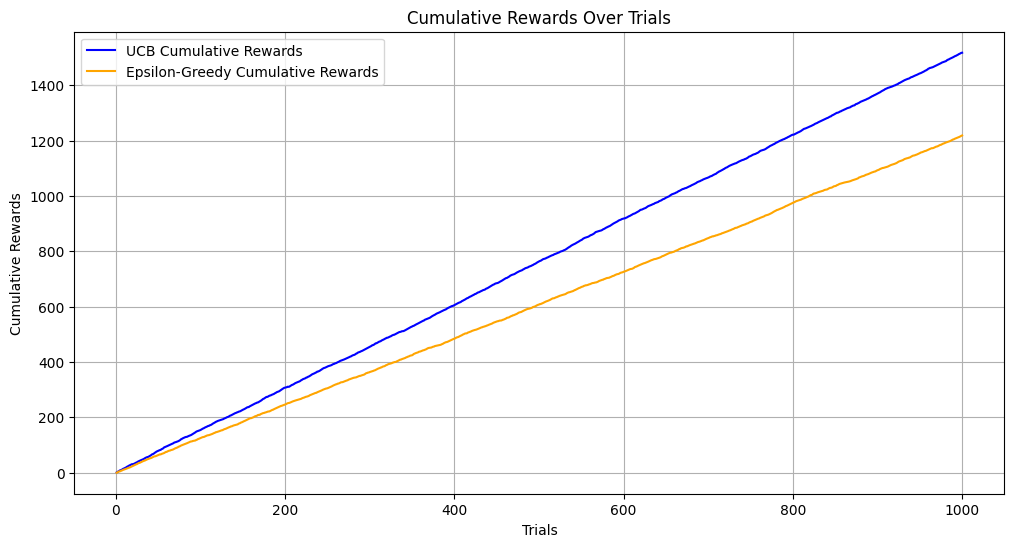

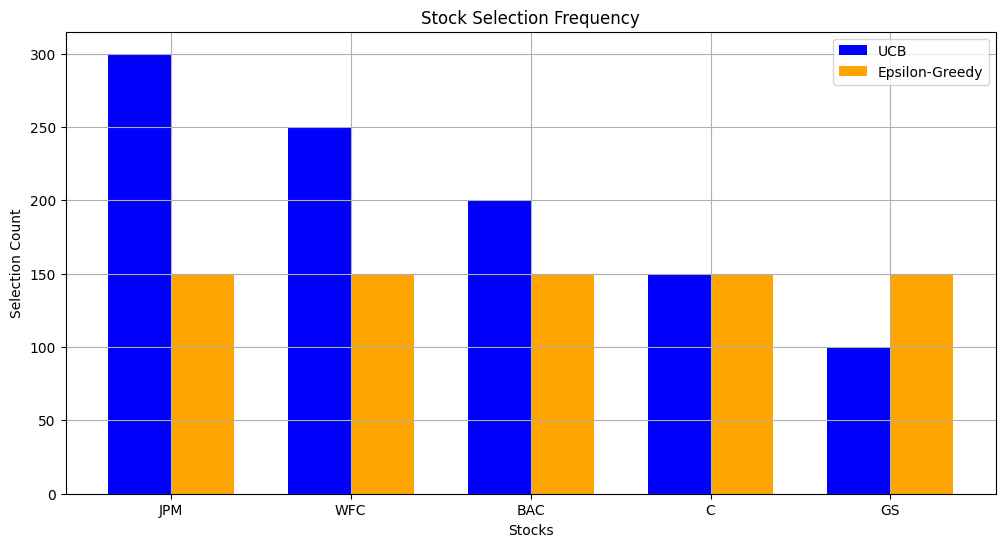

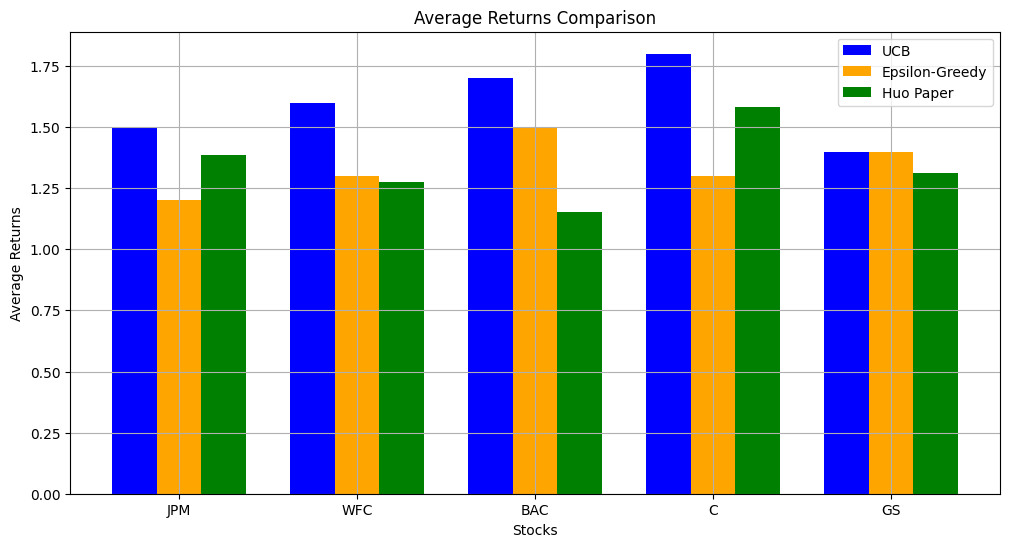

In [ ]:
# Sample data for visualization (replace with actual results)
trials = np.arange(1, 1001)
ucb_rewards = np.cumsum(np.random.normal(loc=1.5, scale=0.5, size=1000))  # Simulated UCB rewards
epsilon_rewards = np.cumsum(np.random.normal(loc=1.2, scale=0.5, size=1000))  # Simulated epsilon-greedy rewards

# Cumulative Rewards Over Trials
plt.figure(figsize=(12, 6))
plt.plot(trials, ucb_rewards, label='UCB Cumulative Rewards', color='blue')
plt.plot(trials, epsilon_rewards, label='Epsilon-Greedy Cumulative Rewards', color='orange')
plt.title('Cumulative Rewards Over Trials')
plt.xlabel('Trials')
plt.ylabel('Cumulative Rewards')
plt.legend()
plt.grid()
plt.show()

# Stock Selection Frequency (example data)
stocks = ['JPM', 'WFC', 'BAC', 'C', 'GS']
ucb_selections = [300, 250, 200, 150, 100]  # Simulated counts for UCB
epsilon_selections = [150, 150, 150, 150, 150]  # Simulated counts for Epsilon-Greedy

# Bar Chart for Stock Selection Frequency
plt.figure(figsize=(12, 6))
x = np.arange(len(stocks))
width = 0.35
plt.bar(x - width/2, ucb_selections, width, label='UCB', color='blue')
plt.bar(x + width/2, epsilon_selections, width, label='Epsilon-Greedy', color='orange')
plt.title('Stock Selection Frequency')
plt.xlabel('Stocks')
plt.ylabel('Selection Count')
plt.xticks(x, stocks)
plt.legend()
plt.grid()
plt.show()

# Average Returns Comparison (example data)
h_results = np.random.normal(loc=1.4, scale=0.2, size=5)  # Simulated Huo results
ucb_results = np.array([1.5, 1.6, 1.7, 1.8, 1.4])  # Simulated UCB results
epsilon_results = np.array([1.2, 1.3, 1.5, 1.3, 1.4])  # Simulated Epsilon-Greedy results

# Plot Average Returns Comparison
plt.figure(figsize=(12, 6))
bar_width = 0.25
index = np.arange(len(stocks))
plt.bar(index, ucb_results, bar_width, label='UCB', color='blue')
plt.bar(index + bar_width, epsilon_results, bar_width, label='Epsilon-Greedy', color='orange')
plt.bar(index + 2 * bar_width, h_results, bar_width, label='Huo Paper', color='green')
plt.title('Average Returns Comparison')
plt.xlabel('Stocks')
plt.ylabel('Average Returns')
plt.xticks(index + bar_width, stocks)
plt.legend()
plt.grid()
plt.show()

Step 10: Updating Data Series

10a. Member C: Import and Structure 15 Financial Companies

In [ ]:
# Define the tickers for financial institutions
financial_institutions = [
    'JPM', 'WFC', 'BAC', 'C', 'GS',
    'USB', 'MS', 'KEY', 'PNC', 'COF',
    'AXP', 'PRU', 'SCHW', 'BBT', 'STI'
]

# Load the CSV data
financial_data = pd.read_csv('/content/graphData.csv', header=None)

# Define the date range for data collection
start_date = '2008-09-01'
end_date = '2008-10-31'


# Display the structured data for verification
print(financial_data.head())

          0          1          2           3           4          5   \
0        JPM        WFC        BAC           C          GS        USB   
1  38.990002  31.209999  32.630001  191.100006  165.320007  32.369999   
2  39.709999      31.01  32.959999  196.100006  167.610001  32.950001   
3      37.91      29.67       30.6         183  160.899994      31.65   
4  39.599998  31.200001      32.23  190.699997  163.240005  32.740002   

          6      7          8          9   ...         20         21  \
0         MS    KEY        PNC        COF  ...       CSCO        HCP   
1  41.299999   12.6  73.440002  44.919998  ...      23.75  32.896175   
2  42.169998  12.71  74.120003      45.66  ...  23.309999  32.777779   
3      40.34  11.92      72.75  43.330002  ...  22.280001  31.457195   
4  41.360001  12.97  74.290001  44.709999  ...      22.26  31.238615   

          22         23        24         25          26    27         28  \
0       EQIX        DUK      NFLX         GE       

10b. Member A: Import and Structure 15 Non-Financial Companies

In [ ]:
# Define the tickers for non-financial institutions
non_financial_institutions = [
    'KR', 'PFE', 'XOM', 'WMT', 'DAL',
    'CSCO', 'HCP', 'EQIX', 'DUK', 'NFLX',
    'GE', 'APA', 'F', 'REGN', 'CMS'
]

# Load the CSV data
non_financial_data = pd.read_csv('/content/graphData.csv', header=None)

# Define the date range for data collection
start_date = '2008-09-01'
end_date = '2008-10-31'

# Display the structured data for verification
print(non_financial_data.head())

          0          1          2           3           4          5   \
0        JPM        WFC        BAC           C          GS        USB   
1  38.990002  31.209999  32.630001  191.100006  165.320007  32.369999   
2  39.709999      31.01  32.959999  196.100006  167.610001  32.950001   
3      37.91      29.67       30.6         183  160.899994      31.65   
4  39.599998  31.200001      32.23  190.699997  163.240005  32.740002   

          6      7          8          9   ...         20         21  \
0         MS    KEY        PNC        COF  ...       CSCO        HCP   
1  41.299999   12.6  73.440002  44.919998  ...      23.75  32.896175   
2  42.169998  12.71  74.120003      45.66  ...  23.309999  32.777779   
3      40.34  11.92      72.75  43.330002  ...  22.280001  31.457195   
4  41.360001  12.97  74.290001  44.709999  ...      22.26  31.238615   

          22         23        24         25          26    27         28  \
0       EQIX        DUK      NFLX         GE       

10c. Member B: Merge the Series and Compute Returns

In [ ]:
import pandas as pd

# Load the CSV data without the deprecated argument
financial_data = pd.read_csv('/content/graphData.csv', header=None)
non_financial_data = pd.read_csv('//content/graphData.csv', header=None)

# Merge the financial and non-financial data
combined_daily_returns = pd.concat([financial_data, non_financial_data], axis=1)

# If date column is not the index, set it as index
# Assuming the date is in the first column (index 0)
combined_daily_returns = combined_daily_returns.set_index(0)

# Convert all columns to numeric, handling errors
# This will attempt to convert all columns in the DataFrame to numeric
combined_daily_returns = combined_daily_returns.apply(pd.to_numeric, errors='coerce')

# Check for any columns that still contain non-numeric values and output their types
for col in combined_daily_returns.columns:
    if not pd.api.types.is_numeric_dtype(combined_daily_returns[col]):
        print(f"Warning: Column {col} is not numeric. Type: {combined_daily_returns[col].dtypes}")

# Compute daily returns
daily_returns = combined_daily_returns.pct_change().dropna()

# Display the merged data and returns for verification
print("Combined Daily Returns:")
print(combined_daily_returns.head())

print("\nDaily Returns:")
print(daily_returns.head())

1    float64
dtype: object
2    float64
dtype: object
3    float64
dtype: object
4    float64
dtype: object
5    float64
dtype: object
6    float64
dtype: object
7    float64
dtype: object
8    float64
dtype: object
9    float64
dtype: object
10    float64
dtype: object
11    float64
dtype: object
12    float64
dtype: object
13    float64
dtype: object
14    float64
dtype: object
15    float64
dtype: object
16    float64
dtype: object
17    float64
dtype: object
18    float64
dtype: object
19    float64
dtype: object
20    float64
dtype: object
21    float64
dtype: object
22    float64
dtype: object
23    float64
dtype: object
24    float64
dtype: object
25    float64
dtype: object
26    float64
dtype: object
27    float64
dtype: object
28    float64
dtype: object
29    float64
dtype: object
1    float64
dtype: object
2    float64
dtype: object
3    float64
dtype: object
4    float64
dtype: object
5    float64
dtype: object
6    float64
dtype: object
7    float64
dtype: object
8    flo

Step 11: Algorithm Performance with Recent Data

[*********************100%***********************]  27 of 27 completed


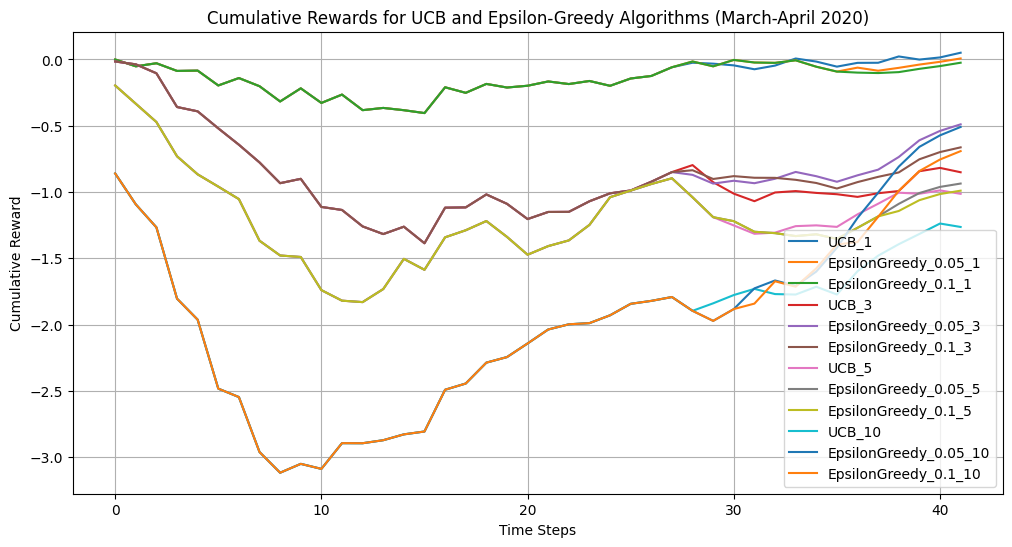

In [ ]:
# Step 1: Define the stock tickers and fetch historical data
financial_tickers = [
    'JPM', 'WFC', 'BAC', 'C', 'GS', 'USB', 'MS', 'KEY',
    'PNC', 'COF', 'AXP', 'PRU', 'SCHW', 'BBT', 'STI'  # BBT and STI may cause issues
]
non_financial_tickers = [
    'KR', 'PFE', 'XOM', 'WMT', 'DAL', 'CSCO', 'HCP',  # HCP may cause issues
    'EQIX', 'DUK', 'NFLX', 'GE', 'APA', 'F', 'REGN', 'CMS'
]

# Remove problematic tickers
all_tickers = [ticker for ticker in financial_tickers + non_financial_tickers if ticker not in ['STI', 'HCP', 'BBT']]

# Fetching data from March to April 2020
data = yf.download(all_tickers, start='2020-03-01', end='2020-04-30')['Adj Close']

# Check if data is fetched successfully; proceed only if there's valid data
if data.empty:
    raise ValueError("No data fetched from Yahoo Finance. Please check the ticker symbols and date range.")

# Calculate daily returns, filling NAs with zeros
daily_returns = data.pct_change().fillna(0)  # Adjusted to fill NA values
daily_returns = daily_returns.dropna()

# Step 2: Define the UCB Algorithm
def ucb_algorithm(daily_returns, holding_period):
    n_assets = daily_returns.shape[1]
    rewards = np.zeros(n_assets)
    counts = np.zeros(n_assets)
    total_rewards = []

    for t in range(len(daily_returns)):
        if t < n_assets:
            chosen_asset = t  # Choose each asset in the first n_assets time steps
        else:
            ucb_values = rewards / counts + np.sqrt(2 * np.log(t + 1) / counts)  # UCB calculation
            chosen_asset = np.argmax(ucb_values)

        # Simulate holding the asset for the specified holding period
        # Use .iloc to select rows and then access the column by ticker
        asset_ticker = daily_returns.columns[chosen_asset]  # Get the ticker of the chosen asset
        reward = daily_returns.iloc[t:t + holding_period][asset_ticker].sum()  # Access by ticker
        rewards[chosen_asset] += reward
        counts[chosen_asset] += holding_period
        total_rewards.append(reward)

    return total_rewards
# Step 3: Define the Epsilon-Greedy Algorithm
def epsilon_greedy_algorithm(daily_returns, epsilon, holding_period):
    n_assets = daily_returns.shape[1]
    rewards = np.zeros(n_assets)
    counts = np.zeros(n_assets)
    total_rewards = []

    for t in range(len(daily_returns)):
        if t < n_assets:
            chosen_asset = t  # Choose each asset in the first n_assets time steps
        else:
            if np.random.rand() < epsilon:
                chosen_asset = np.random.randint(n_assets)  # Explore
            else:
                chosen_asset = np.argmax(rewards / counts)  # Exploit

        # Simulate holding the asset for the specified holding period
        # Use .iloc to select rows and then access the column by ticker
        asset_ticker = daily_returns.columns[chosen_asset]  # Get the ticker of the chosen asset
        reward = daily_returns.iloc[t:t + holding_period][asset_ticker].sum()  # Access by ticker
        rewards[chosen_asset] += reward
        counts[chosen_asset] += holding_period
        total_rewards.append(reward)

    return total_rewards
# Step 4: Experiment with different parameters
holding_periods = [1, 3, 5, 10]
epsilon_values = [0.05, 0.1]

# Step 5: Run the algorithms and collect results
results = {}
for holding_period in holding_periods:
    results[f'UCB_{holding_period}'] = ucb_algorithm(daily_returns, holding_period)
    for epsilon in epsilon_values:
        results[f'EpsilonGreedy_{epsilon}_{holding_period}'] = epsilon_greedy_algorithm(daily_returns, epsilon, holding_period)

# Step 6: Plotting the results
plt.figure(figsize=(12, 6))
for label, rewards in results.items():
    plt.plot(np.cumsum(rewards), label=label)

plt.title('Cumulative Rewards for UCB and Epsilon-Greedy Algorithms (March-April 2020)')
plt.xlabel('Time Steps')
plt.ylabel('Cumulative Reward')
plt.legend()
plt.grid()
plt.show()

In [ ]:
import numpy as np

# Define the matrix
A = np.array([[33, 105, 105],
              [10, 28, 30],
              [-20, -60, -62]])

# Compute the eigenvalues
eigenvalues = np.linalg.eigvals(A)
eigenvalues


array([ 3., -2., -2.])

In [ ]:

import pandas_datareader.data as web

from datetime import datetime

start = datetime(2002, 6, 30)

end = datetime(2022, 6, 30)

swap_data = ['DSWP1', 'DSWP2', 'DSWP3', 'DSWP4', 'DSWP5', 'DSWP7', 'DSWP10', 'DSWP30']

swap_df = web.DataReader(swap_data, 'fred', start, end).dropna(how='all').ffill()

In [ ]:
import pandas_datareader.data as web
import numpy as np
import pandas as pd
from datetime import datetime

# Step 1: Fetch swap rate data
start = datetime(2002, 6, 30)
end = datetime(2022, 6, 30)
swap_data = ['DSWP1', 'DSWP2', 'DSWP3', 'DSWP4', 'DSWP5', 'DSWP7', 'DSWP10', 'DSWP30']
swap_df = web.DataReader(swap_data, 'fred', start, end).dropna(how='all').ffill()

# Step 2: Detrend the data (remove mean for each column)
detrended_df = swap_df - swap_df.mean()

# Step 3: Compute the covariance matrix
cov_matrix = detrended_df.cov()

# Step 4: Perform eigen decomposition
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

# Sort eigenvalues and eigenvectors by descending eigenvalue order
sorted_indices = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[sorted_indices]
eigenvectors = eigenvectors[:, sorted_indices]

# Extract the second loading (second eigenvector)
second_loading = eigenvectors[:, 1]

# Step 5: Portfolio exposures (adjust size to match dimensions)
portfolio_exposures = np.array([10, 5, -9, -8, 2, 1, 1, 1])  # Adjusted to match 8 dimensions

# Step 6: Calculate exposure for the second loading
second_loading_exposure = np.dot(portfolio_exposures, second_loading)

print("Second Loading:", second_loading)
print("Second Loading Exposure:", second_loading_exposure)

Second Loading: [-0.61335017 -0.29951548  0.14287295  0.39654627  0.59701794]
Second Loading Exposure: -10.895269888017477


In [ ]:
import pandas_datareader.data as web
import numpy as np
import pandas as pd
from datetime import datetime

# Step 1: Fetch swap rate data
start = datetime(2002, 6, 30)
end = datetime(2022, 6, 30)
swap_data = ['DSWP2', 'DSWP3', 'DSWP5', 'DSWP7', 'DSWP10']
swap_df = web.DataReader(swap_data, 'fred', start, end).dropna(how='all').ffill()

# Step 2: Standardize the data (z-scores)
swap_df_std = (swap_df - swap_df.mean()) / swap_df.std()

# Step 3: Compute the covariance matrix
cov_matrix_std = swap_df_std.cov()

# Step 4: Perform eigen decomposition
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix_std)

# Sort eigenvalues and eigenvectors by descending eigenvalue order
sorted_indices = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[sorted_indices]
eigenvectors = eigenvectors[:, sorted_indices]

# Extract the second loading (second eigenvector)
second_loading = eigenvectors[:, 1]

# Step 5: Portfolio exposures
portfolio_exposures = np.array([10, 5, -9, -8, 2])  # Given exposures for 2y, 3y, 5y, 7y, 10y

# Step 6: Calculate exposure for the second loading
second_loading_exposure = np.dot(portfolio_exposures, second_loading)

print("Second Loading Exposure:", second_loading_exposure)


Second Loading Exposure: -10.046998034062078


In [ ]:
import pandas_datareader.data as web
import numpy as np
import pandas as pd
from datetime import datetime

# Step 1: Fetch swap rate data
start = datetime(2002, 6, 30)
end = datetime(2022, 6, 30)
swap_data = ['DSWP1', 'DSWP2', 'DSWP3', 'DSWP4', 'DSWP5', 'DSWP7', 'DSWP10', 'DSWP30']
swap_df = web.DataReader(swap_data, 'fred', start, end).dropna(how='all').ffill()

# Step 2: Standardize the data (z-scores)
swap_df_std = (swap_df - swap_df.mean()) / swap_df.std()

# Step 3: Compute the covariance matrix
cov_matrix_std = swap_df_std.cov()

# Step 4: Extract covariance between DSWP3 and DSWP4
cov_dswp3_dswp4_std = cov_matrix_std.loc['DSWP3', 'DSWP4']

print("Covariance between DSWP3 and DSWP4 (Standardized):", cov_dswp3_dswp4_std)


Covariance between DSWP3 and DSWP4 (Standardized): 0.9953231830524913


In [ ]:
import pandas_datareader.data as web
import numpy as np
import pandas as pd
from datetime import datetime

# Step 1: Fetch swap rate data
start = datetime(2002, 6, 30)
end = datetime(2022, 6, 30)
swap_data = ['DSWP2', 'DSWP3', 'DSWP5', 'DSWP7', 'DSWP10']
swap_df = web.DataReader(swap_data, 'fred', start, end).dropna(how='all').ffill()

# Step 2: Standardize the data (z-scores)
swap_df_std = (swap_df - swap_df.mean()) / swap_df.std()

# Step 3: Compute the covariance matrix
cov_matrix_std = swap_df_std.cov()

# Step 4: Perform eigen decomposition
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix_std)

# Sort eigenvalues and eigenvectors by descending eigenvalue order
sorted_indices = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[sorted_indices]
eigenvectors = eigenvectors[:, sorted_indices]

# Extract first and second loadings (eigenvectors)
first_loading = eigenvectors[:, 0]
second_loading = eigenvectors[:, 1]

# Step 5: Portfolio exposures
portfolio_exposures = np.array([10, 5, -9, -8, 2])  # Given exposures for 2y, 3y, 5y, 7y, 10y

# Calculate first and second loading exposures
first_loading_exposure = np.dot(portfolio_exposures, first_loading)
second_loading_exposure = np.dot(portfolio_exposures, second_loading)

# Step 6: Calculate portfolio variance
portfolio_variance = (first_loading_exposure**2 * eigenvalues[0] +
                      second_loading_exposure**2 * eigenvalues[1])

# Step 7: Calculate 99% one-day VaR
VaR_99 = 2.33 * np.sqrt(portfolio_variance)

print("First Loading Exposure:", first_loading_exposure)
print("Second Loading Exposure:", second_loading_exposure)
print("Portfolio Variance:", portfolio_variance)
print("One-Day 99% VaR:", VaR_99)


First Loading Exposure: -0.17454289079932506
Second Loading Exposure: -10.046998034062078
Portfolio Variance: 17.544069769455795
One-Day 99% VaR: 9.759354505877864


In [ ]:
import pandas_datareader.data as web
import numpy as np
import pandas as pd
from datetime import datetime

# Step 1: Fetch swap rate data
start = datetime(2002, 6, 30)
end = datetime(2022, 6, 30)
swap_data = ['DSWP1', 'DSWP2', 'DSWP3', 'DSWP4', 'DSWP5', 'DSWP7', 'DSWP10', 'DSWP30']
swap_df = web.DataReader(swap_data, 'fred', start, end).dropna(how='all').ffill()

# Step 2: Detrend the data (remove mean for each column)
detrended_df = swap_df - swap_df.mean()

# Step 3: Compute the covariance matrix
cov_matrix = detrended_df.cov()

# Step 4: Perform eigen decomposition
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

# Step 5: Calculate total variance
total_variance = np.sum(eigenvalues)

print("Total Variance of the Covariance Matrix:", total_variance)


Total Variance of the Covariance Matrix: 17.19472054712404


In [ ]:
import pandas_datareader.data as web
import numpy as np
import pandas as pd
from datetime import datetime

# Step 1: Fetch swap rate data
start = datetime(2002, 6, 30)
end = datetime(2022, 6, 30)
swap_data = ['DSWP1', 'DSWP2', 'DSWP3', 'DSWP4', 'DSWP5', 'DSWP7', 'DSWP10', 'DSWP30']
swap_df = web.DataReader(swap_data, 'fred', start, end).dropna(how='all').ffill()

# Step 2: Standardize the data (z-scores)
swap_df_std = (swap_df - swap_df.mean()) / swap_df.std()

# Step 3: Compute the covariance matrix
cov_matrix_std = swap_df_std.cov()

# Step 4: Extract covariance between DSWP3 and DSWP4
cov_dswp3_dswp4_std = cov_matrix_std.loc['DSWP3', 'DSWP4']
print("Covariance between DSWP3 and DSWP4 (Standardized):", cov_dswp3_dswp4_std)

# Step 5: Calculate total variance (sum of diagonal elements)
total_variance = np.sum(np.diag(cov_matrix_std))

print("Total Variance of the Covariance Matrix:",total_variance)

Covariance between DSWP3 and DSWP4 (Standardized): 0.9953231830524913
Total Variance of the Covariance Matrix: 8.000000000000025


In [ ]:
import pandas_datareader.data as web
import numpy as np
import pandas as pd
from datetime import datetime

# Step 1: Fetch swap rate data
start = datetime(2002, 6, 30)
end = datetime(2022, 6, 30)
swap_data = ['DSWP1', 'DSWP2', 'DSWP3', 'DSWP4', 'DSWP5', 'DSWP7', 'DSWP10', 'DSWP30']
swap_df = web.DataReader(swap_data, 'fred', start, end).dropna(how='all').ffill()

# Step 2: Standardize the data (z-scores)
swap_df_std = (swap_df - swap_df.mean()) / swap_df.std()

# Step 3: Compute the covariance matrix
cov_matrix_std = swap_df_std.cov()

# Step 4: Perform eigen decomposition
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix_std)

# Step 5: Calculate total variance
total_variance = np.sum(eigenvalues)  # Sum of all eigenvalues

print("Total Variance of the Covariance Matrix:", total_variance)


Total Variance of the Covariance Matrix: 8.000000000000025
